In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
from activ.analytics import heatmap
from activ.clustering import UmapClusteringResults
from os.path import dirname, join
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

In [4]:
f = h5py.File('/Users/ahyeon/Desktop/activ misc/predict_scores2.h5', 'r')

In [5]:
predictions = f['score'][:]
norm_predictions = f['norm_score'][:]
labels = f['clusters'][:]
umap_dims = f['umap_dimensions'][:]
cluster_sizes = f['cluster_sizes'][:]

In [6]:
def conf_alliter(size, predicted, actual):
    confalliter = []
    for j in range(50):
        conf = np.zeros((size,size))
        labs = list(map(int, actual[j][size-2]))
        preds = list(map(int, predicted[j][size-2]))
        for l, p in zip(labs, preds):
            conf[l,p] += 1
        denom = conf.sum(axis=0)
        new_conf = conf/denom
        plt.matshow(new_conf, cmap='gray_r')
        confalliter.append(new_conf)
    return confalliter

/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


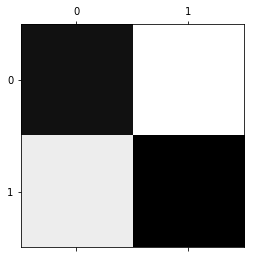

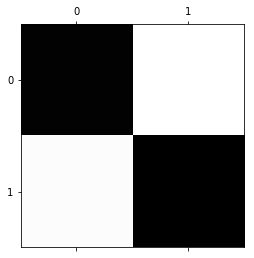

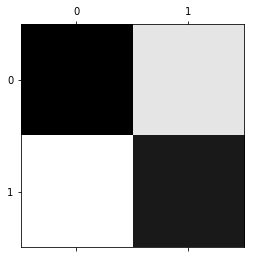

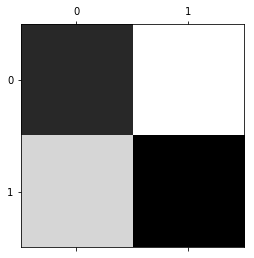

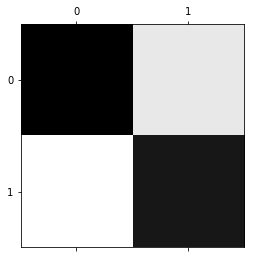

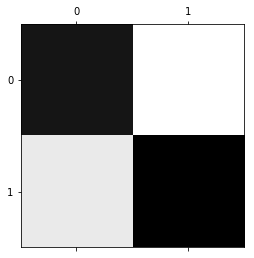

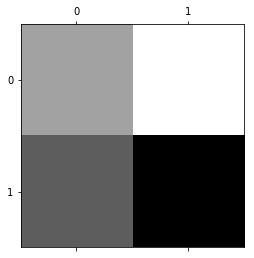

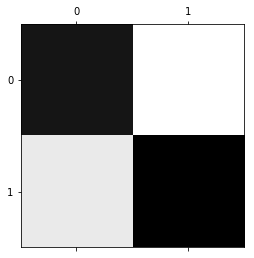

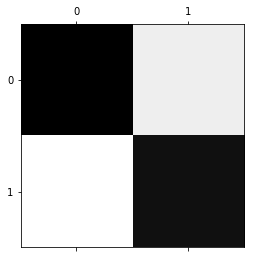

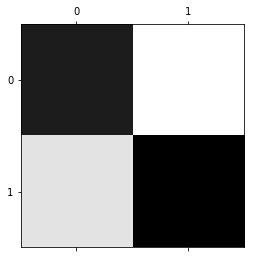

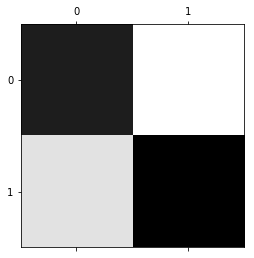

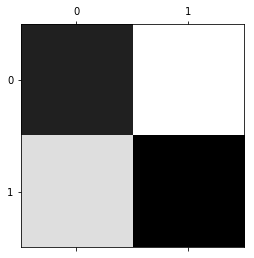

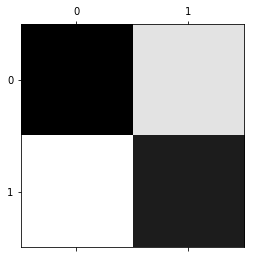

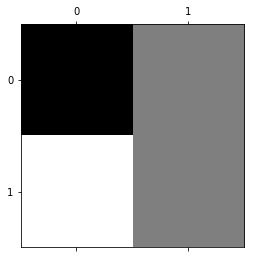

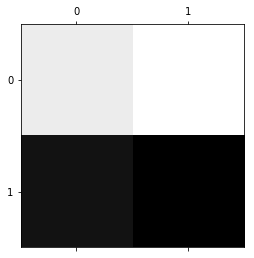

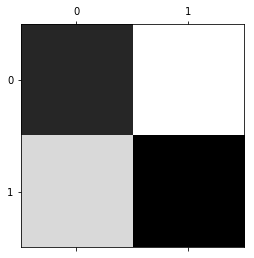

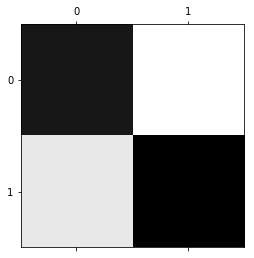

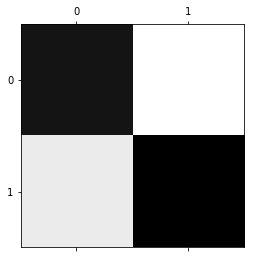

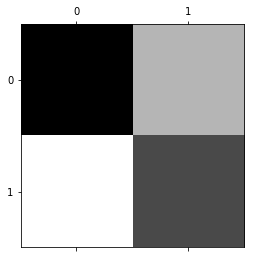

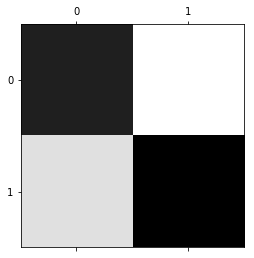

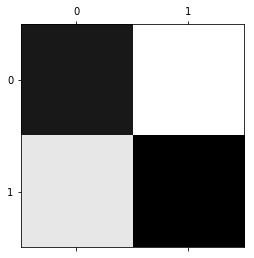

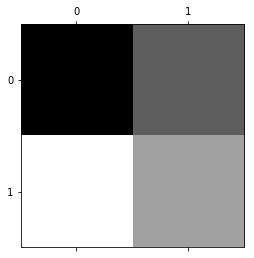

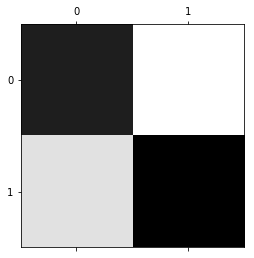

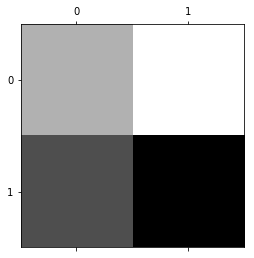

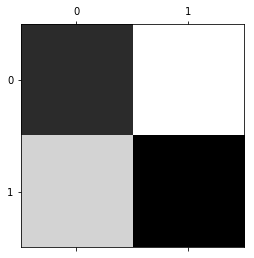

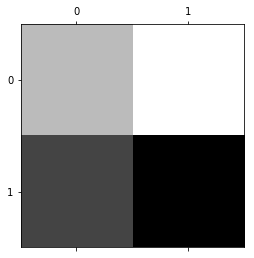

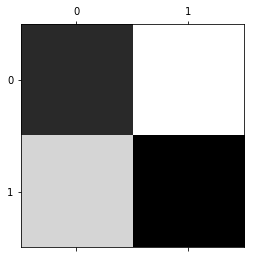

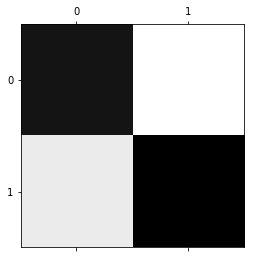

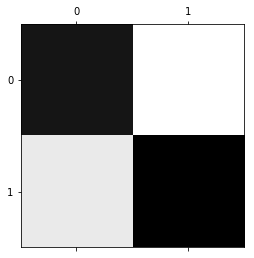

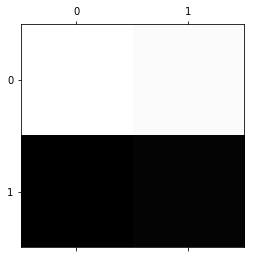

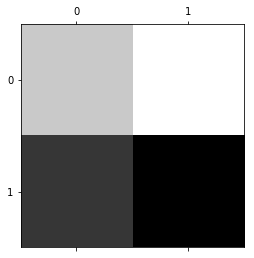

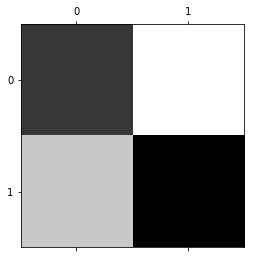

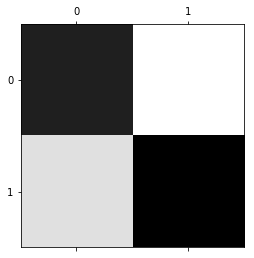

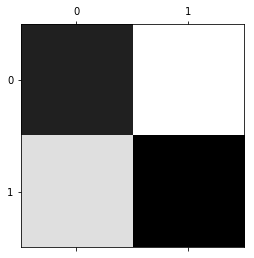

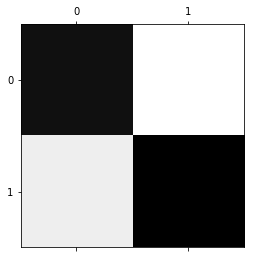

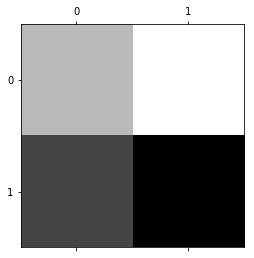

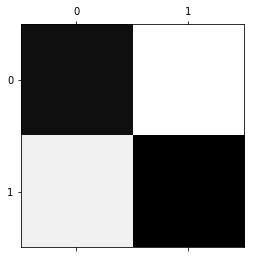

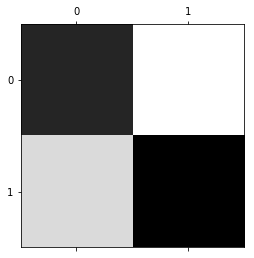

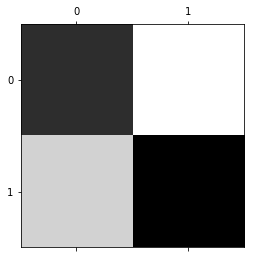

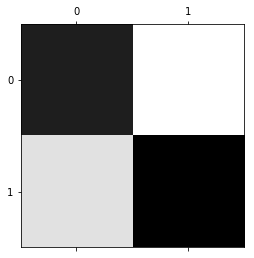

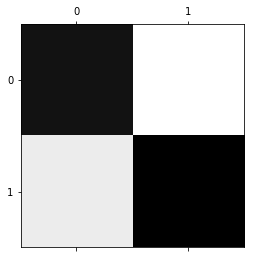

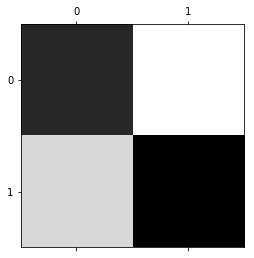

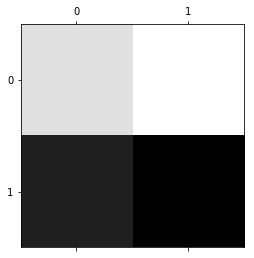

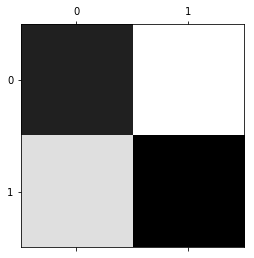

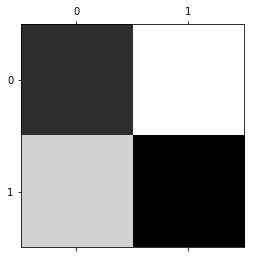

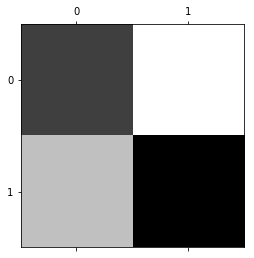

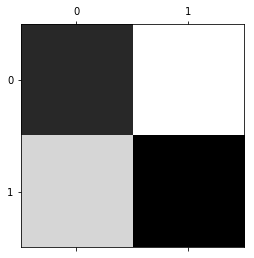

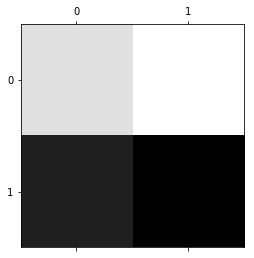

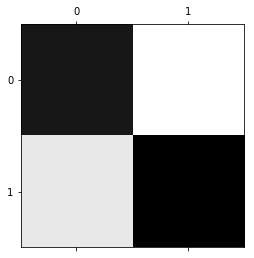

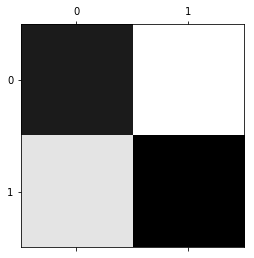

In [7]:
confalliter = conf_alliter(2, predictions, labels)

In [12]:
new = np.matrix(confalliter[0])
new.shape[0]

2

In [14]:
confalliter[0]

array([[ 0.56910569,  0.41935484],
       [ 0.43089431,  0.58064516]])

In [15]:
# Return true positive, true negative, false positive, false negative given a matrix

def foobar(conf_mat):
    print('here')
    this = np.matrix(conf_mat)
    print(this)
    print(this.shape[0])
    tps = []
    tns = []
    fps = []
    fns = []
    for i in range(this.shape[0]):
        tp = this[i,i]
        tn = this.sum() - this[i,:].sum() - this[:,i].sum()
        fp = this[:,i].sum() - this[i,i]
        fn = this[i,:].sum() - this[i,i]
        tps.append(tp)
        tns.append(tn)
        fps.append(fp)
        fns.append(fn)
    avg_tps = np.mean(tps)
    avg_tns = np.mean(tns)
    avg_fps = np.mean(fps)
    avg_fns = np.mean(fns)
    return avg_tps, avg_tns, avg_fps, avg_fns


In [ ]:
a,b,c,d = foobar(confalliter[0])

In [14]:
# specificity
def true_neg_rate(tn, fp):
    return tn/(tn+fp)

# sensitivity/recall
def true_pos_rate(tp, fn):
    return tp/(tp+fn)

def false_neg_rate(fn, tp):
    return fn/(fn+tp)
    
def false_pos_rate(fp, tn):
    return fp/(fp+tn)
    
def precision(tp, fp):
    return tp/(tp+fp)

def fscore(tp, fp, fn):
    return (2*tp)/(2*tp + fp + fn)

def accuracy(tp, tn, fp, fn):
    return (tp+tn)/(tp+tn+fp+fn)

In [263]:
for x,y in zip(tns, fps):
    spec = true_neg_rate(x,y)
    print(spec)

0.0363636363636
-0.04


In [78]:
# Confusion Matrix

def conf_mat(data):
    conf = np.zeros((data.shape[0],csize,csize))

    for i in range(data.shape[0]):
        labs = list(map(int,labels[i,csize-2,:]))
        preds = list(map(int,data[i,csize-2,:]))
        for l,p in zip(labs, preds):
            conf[i,l,p] += 1

    new_conf = conf.mean(axis=0)
    new_conf = np.matrix((new_conf))
    denom = np.array(new_conf.sum(axis=1))
    new_denom = np.repeat(denom, csize, axis=1)
    this = new_conf/new_denom
    return(this)
    


In [162]:
len(confalliter)

1

In [80]:
norm_mat = conf_mat(predictions, 49, 'Prediction/Norm Prediction')


IndexError: too many indices for array

In [79]:
plt.figure(figsize=(10,10))
heatmap(this, cluster_sizes, cluster_sizes, xlab='Number of Clusters', ylab = 'Number of Clusters', 
            title='{} Confusion Matrix using Predictions'.format(title))
plt.savefig('/Users/ahyeon/Desktop/activ misc/{}_confusionmatrix.pdf'.format(title))

NameError: name 'title' is not defined

<Figure size 720x720 with 0 Axes>

In [127]:
confalliter[0].shape

(50, 50)

In [125]:
plt.matshow(confalliter[0][0])

ValueError: not enough values to unpack (expected 2, got 1)

In [15]:
tp, tn, fp, fn = confusion_matrix_values(this, 20, 50)
f_score = fscore(tp, fp, fn)
recall = true_pos_rate(tp, fn)
preci = precision(tp, fp)

f_score, recall, preci

(0.22320252206844046, 0.22374429223744291, 0.22266336922583693)

(0.0, 2.0)

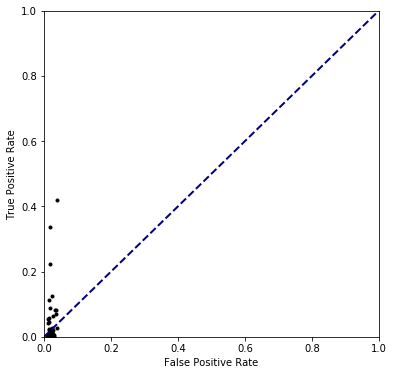

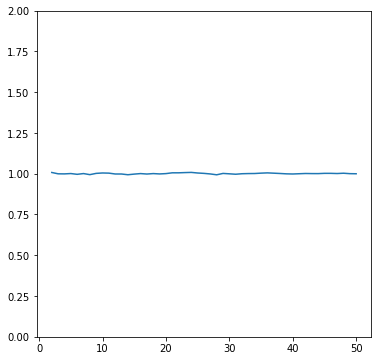

In [69]:
# ROC Curve
fprs = []
tprs = []
f_scores = []
accuracies = []
specificity = []
sensitivity = []
size=49

norm_accuracies = []
for i in range(size):
    tp, tn, fp, fn = confusion_matrix_values(this, i, size)
    fpr = false_pos_rate(fp, tn)
    tpr = true_pos_rate(tp, fn)
    spec = true_neg_rate(tn, fp)
    sens = true_pos_rate(tp, fn)
    preci = precision(tp, fp)
    f_score = fscore(tp, fp, fn)
    acc = accuracy(tp, tn, fp, fn)
    f_scores.append(f_score)
    fprs.append(fpr)
    tprs.append(tpr)
    accuracies.append(acc)
    specificity.append(spec)
    sensitivity.append(sens)
    
for i in range(size):
    tp2, tn2, fp2, fn2 = confusion_matrix_values(norm_mat, i, size)
    norm_acc = accuracy(tp2, tn2, fp2, fn2)
    norm_accuracies.append(norm_acc)
    
plt.figure(figsize=(6,6))
plt.plot(fprs, tprs, '.', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.figure(figsize=(6,6))
plt.plot(cluster_sizes, np.array(accuracies)/np.array(norm_accuracies))
plt.ylim([0.0, 2.0])

In [29]:
len(f_scores)
len(cluster_sizes)

49

Text(0.5,1,'F Score of Cluster Sizes')

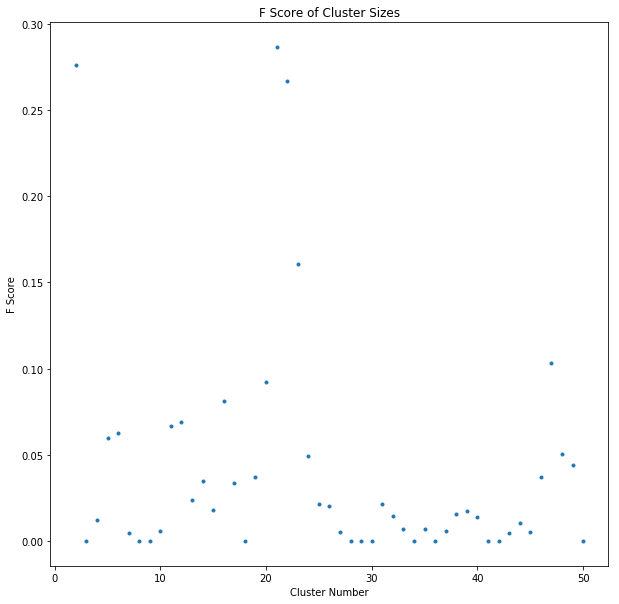

In [32]:
plt.plot(cluster_sizes,f_scores,'.')
plt.xlabel('Cluster Number')
plt.ylabel('F Score')
plt.title('F Score of Cluster Sizes')

## do fscore/norm fscore

In [96]:
pred_bin = label_binarize(predictions[0][0], classes=cluster_sizes)

In [97]:
pred_bin.shape

(247, 49)

In [ ]:
# ROC Curve

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

(150, 3)
(150, 3)


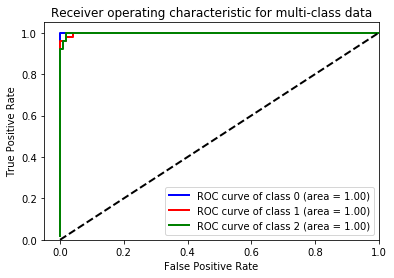

In [100]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

iris = datasets.load_iris()
X = iris.data
y = iris.target
# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]
print(y_bin.shape)
clf = OneVsRestClassifier(QDA())
y_score = cross_val_predict(clf, X, y, cv=10 ,method='predict_proba')
print(y_score.shape)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()